# Inspect FLORIS Model

Use the provided FLORIS model to introduce the test site

## Preliminary information

This repository introduces FLASC (https://github.com/NREL/flasc) capabilities by illustrating their
use on a data set taken from a real field campaign of wake steering which has been made open-source.

The data comes from the SMARTEOLE Wind Farm Control open data set (https://zenodo.org/record/7342466) and is 
a field campaign carried out on the 7-turbine wind farm at (Sole du Moulin Vieux, located in France). This data set has been obtained by ENGIE Green in the scope of French national project SMARTEOLE (grant no. ANR-14-CE05-0034).

The publication about the test is available online here: https://wes.copernicus.org/articles/6/1427/2021/wes-6-1427-2021.html


In [1]:
import matplotlib.pyplot as plt

from models import load_smarteole_floris

from flasc.visualization import plot_floris_layout, plot_layout_only, plot_layout_with_waking_directions
from floris.tools.visualization import visualize_cut_plane

# Load the FLORIS model

Load the FLORIS model (defaulting to the GCH wake model)

In [2]:
## Load the FLORIS model
fi = load_smarteole_floris(wake_model="gch", wd_std=0.0)

In [3]:
## Define the turbine names

# Set up an array to give turbines names which match Figure 1 
# of https://wes.copernicus.org/articles/6/1427/2021/wes-6-1427-2021.pdf
# to complement simple 0-based indices
turbine_names = ["SMV{:d}".format(i) for i in range(1, 8)]
turbine_names

['SMV1', 'SMV2', 'SMV3', 'SMV4', 'SMV5', 'SMV6', 'SMV7']

Text(0.5, 1.0, 'Plot with turbine names')

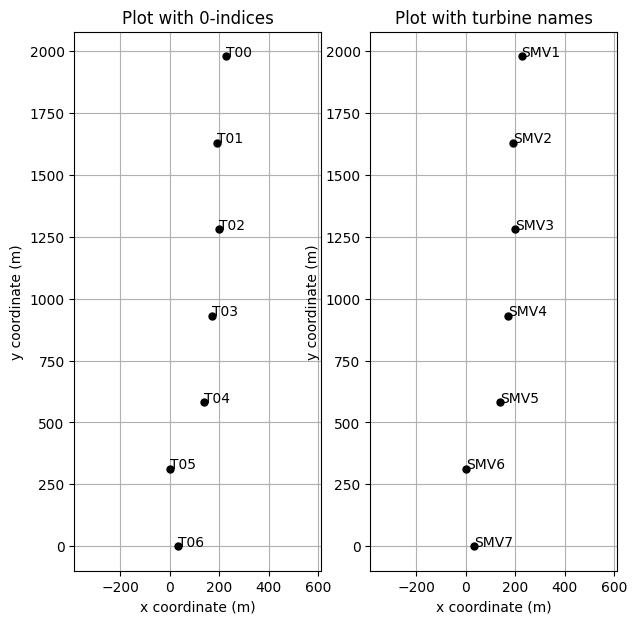

In [4]:
## Show the basic layout
fig, axarr = plt.subplots(1,2,figsize=(7, 7))

ax = axarr[0]
plot_layout_only(fi,ax=ax)
ax.set_title('Plot with 0-indices')

ax = axarr[1]
plot_layout_only(fi,{'turbine_names':turbine_names},ax=ax)
ax.set_title('Plot with turbine names')

Henceforth we refer to the turbines by their 0-index, but the plot above shows the relationship
to the names in the paper

# Show inter-turbine spacings and directions

Use FLASC visualization tools to illustrate the direction and space between turbines

Text(0.5, 0.98, 'Plot with turbine distances and wake directions')

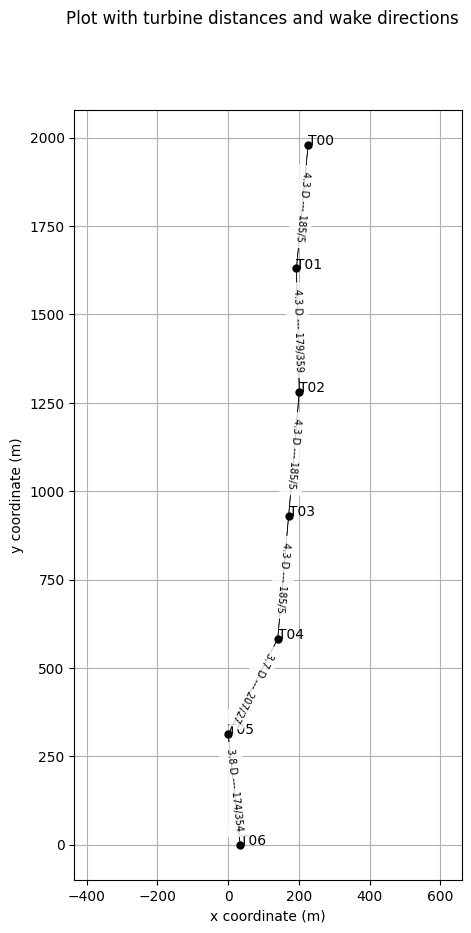

In [5]:
## Show the basic layout
fig, ax = plt.subplots(figsize=(5, 10))

plot_layout_with_waking_directions(fi,
                                    ax=ax,
                                   limit_dist_D=5)
fig.suptitle('Plot with turbine distances and wake directions')

# Illustrating wake steering roles

In the test, turbine 5 (SMV6) implemented wake steering in the directions where it was waking turbine 4 (SMV5).  The remaining turbines are available as reference turbines (turbine 0-3 and turbine 6)

Text(100, 350, 'Downstream turbine')

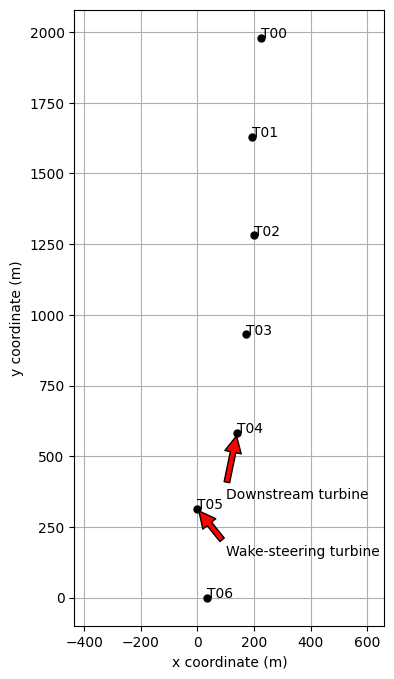

In [7]:
layout_x = fi.layout_x
layout_y = fi.layout_y

fig, ax = plt.subplots(figsize=(4,8))
plot_layout_only(fi,ax=ax)

ax.annotate('Wake-steering turbine',
             xy=(layout_x[5], layout_y[5]),
             xytext=(100, 150),
            arrowprops=dict(facecolor='r', shrink=0.05))

ax.annotate('Downstream turbine',
             xy=(layout_x[4], layout_y[4]),
             xytext=(100, 350),
            arrowprops=dict(facecolor='r', shrink=0.05))

# About the turbines

FLORIS includes certain information about the Senvion MM 82 turbines that are at the site.

In [8]:
hub_height = fi.floris.farm.hub_heights.flatten()[0]
D = fi.floris.farm.rotor_diameters.flatten()[0]

print(f'Turbine hub height: {hub_height} m')
print(f'Turbine rotor diameter: {D} m')

Turbine hub height: 80.0 m
Turbine rotor diameter: 82.0 m


(<Figure size 1600x800 with 3 Axes>,
 [<Axes: title={'center': 'Farm layout'}, xlabel='x coordinate (m)', ylabel='y coordinate (m)'>,
  <Axes: xlabel='Wind speed (m/s)', ylabel='Power coefficient (-)'>,
  <Axes: xlabel='Wind speed (m/s)', ylabel='Thrust coefficient (-)'>])

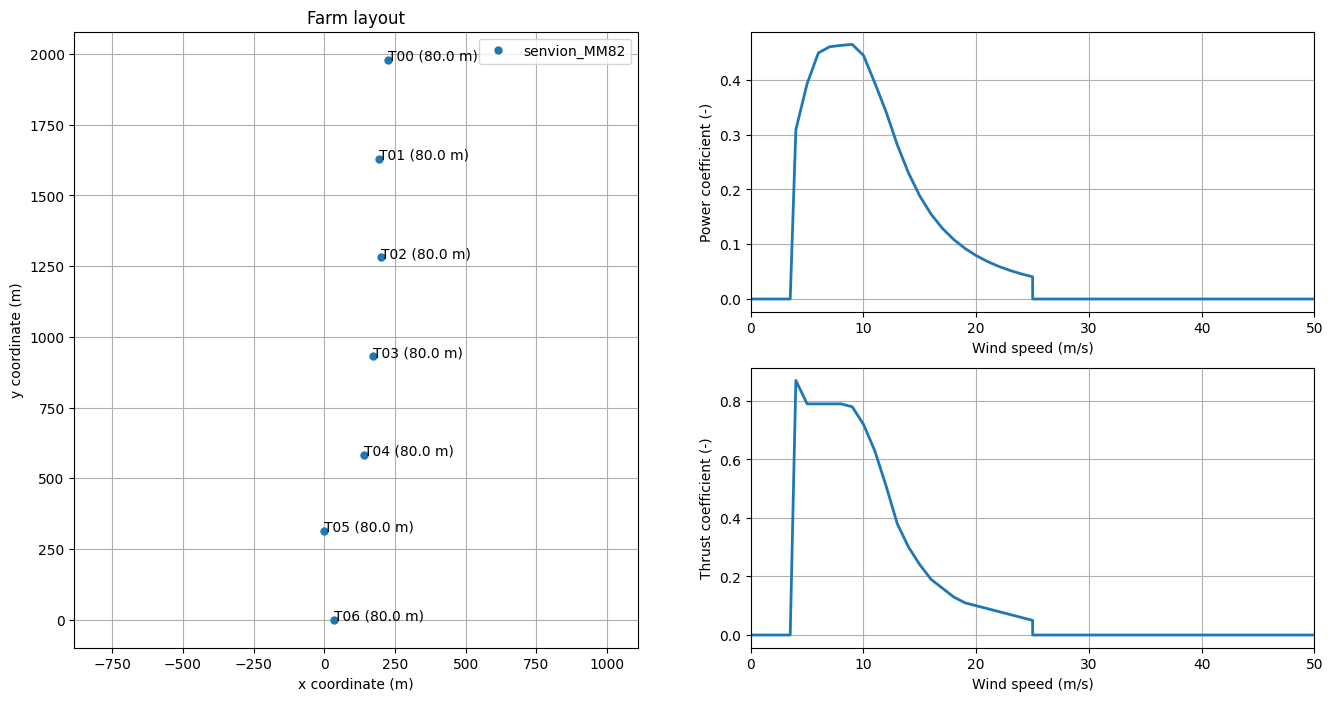

In [9]:
# Show the power and thrust curves with the layout
plot_floris_layout(fi, plot_terrain=False)

# Waking direction

As indicated in figures above, turbine 4 is downstream of turbine 5 when the wind direction is 207 degrees.
We can use FLORIS visualization to illustrate this condition

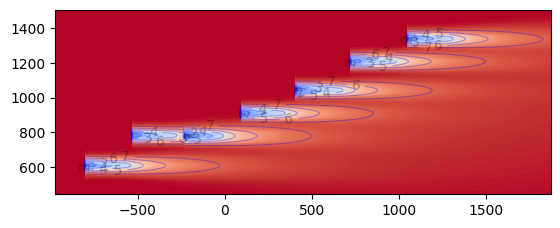

In [10]:
fi.reinitialize(wind_directions=[207], wind_speeds=[8.])
fi.calculate_wake()
horizontal_plane = fi.calculate_horizontal_plane(height=hub_height)

visualize_cut_plane(horizontal_plane)